# Amazon prime Movie Reviews dataset

Loading the dataset

In [110]:
import pandas as pd
import numpy as np

In [111]:
df = pd.read_excel("C:/Users/AJITHA REDDY/Downloads/Amazon-prime-cleaned.xlsx")

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    10851 non-null  object 
 1   Title                 10851 non-null  object 
 2   Type                  10851 non-null  object 
 3   Description           10851 non-null  object 
 4   Release_year          10851 non-null  float64
 5   Age_certification     10851 non-null  object 
 6   Duration              10851 non-null  float64
 7   Genres                10851 non-null  object 
 8   Production_countries  10851 non-null  object 
 9   Seasons               10851 non-null  float64
 10  Imdb_id               10371 non-null  object 
 11  Rating                10851 non-null  float64
 12  Imdb_votes            10851 non-null  float64
 13  Tmdb_popularity       10851 non-null  float64
 14  Tmdb_score            10851 non-null  float64
dtypes: float64(7), obje

In [113]:
df.shape

(10865, 15)

In [114]:
df.head()

,Id,Title,Type,Description,Release_year,Age_certification,Duration,Genres,Production_countries,Seasons,Imdb_id,Rating,Imdb_votes,Tmdb_popularity,Tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946.0,PG,130.0,"drama, family, fantasy, romance, comedy",US,0.0,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933.0,Unknown,69.0,"comedy, war",US,0.0,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940.0,Unknown,92.0,"drama, romance, comedy",US,0.0,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934.0,TV-PG,19.0,"comedy, family",US,26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948.0,Unknown,133.0,"western, drama, romance, action",US,0.0,tt0040724,7.8,32210.0,12.400,7.400


In [115]:
df.columns

Index(['Id', 'Title', 'Type', 'Description', 'Release_year',
       'Age_certification', 'Duration', 'Genres', 'Production_countries',
       'Seasons', 'Imdb_id', 'Rating', 'Imdb_votes', 'Tmdb_popularity',
       'Tmdb_score'],
      dtype='object')

Data Cleaning

In [116]:
#Drop duplicates (if any)
df.drop_duplicates(inplace=True)

In [117]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [118]:
#Handle missing values
## Fill missing descriptions with 'No description available'
df['Description'].fillna('No description available', inplace=True)

In [119]:
## Fill missing Age Certification with 'Unknown'
df['Age_certification'].fillna('Unknown', inplace=True)

In [120]:
## Fill missing Seasons with 0 (assuming 0 for movies)
df['Seasons'].fillna(0, inplace=True)

In [121]:
## Fill missing numeric values (IMDb, TMDb scores) with median values
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Imdb_votes'].fillna(df['Imdb_votes'].median(), inplace=True)
df['Tmdb_popularity'].fillna(df['Tmdb_popularity'].median(), inplace=True)
df['Tmdb_score'].fillna(df['Tmdb_score'].median(), inplace=True)

In [122]:
df.describe

<bound method NDFrame.describe of               Id                               Title   Type  \
0        tm87233               It's a Wonderful Life  MOVIE   
1       tm143047                           Duck Soup  MOVIE   
2        tm83884                     His Girl Friday  MOVIE   
3        ts20945                   The Three Stooges   SHOW   
4         tm5012                           Red River  MOVIE   
...          ...                                 ...    ...   
10860  tm1292884                                Hunt  MOVIE   
10861  tm1284753                  Ennalum Ente Aliya  MOVIE   
10862  tm1303380  Anubhav Singh Bassi: Bas Kar Bassi  MOVIE   
10863  tm1307408     Pinkfong! Summer in Wonderville  MOVIE   
10864  tm1297385                            Chapelle  MOVIE   

                                             Description  Release_year  \
0      A holiday favourite for generations...  George...        1946.0   
1      Rufus T. Firefly is named president/dictator o...     

In [123]:
# Check for missing values
print(df.isnull().sum())

Id                        1
Title                     1
Type                      1
Description               0
Release_year              1
Age_certification         0
Duration                  1
Genres                    1
Production_countries      1
Seasons                   0
Imdb_id                 481
Rating                    0
Imdb_votes                0
Tmdb_popularity           0
Tmdb_score                0
dtype: int64


In [124]:
# Handle missing values (example: fill with 'Unknown' or drop)
df['Age_certification'].fillna('Unknown', inplace=True)
df.dropna(subset=['Rating'], inplace=True)

# Standardize column names (if needed)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert data types
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

Exploratory Data Analysis

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

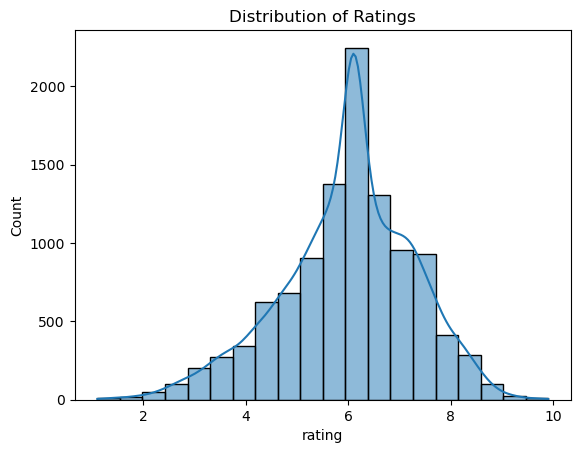

In [126]:
# Distribution of ratings
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.show()

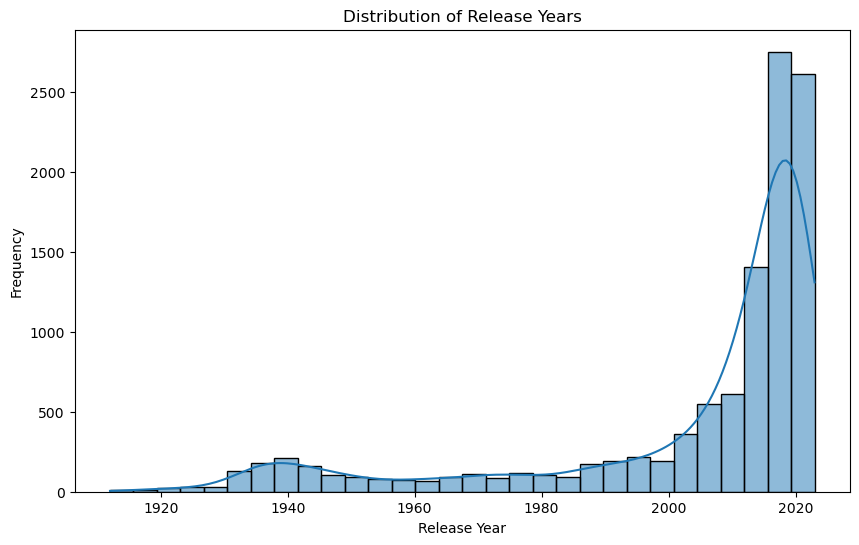

In [127]:
# Distribution of release years
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

Genre Counts:
 drama            5494
comedy           3348
thriller         2498
action           2058
romance          1857
crime            1400
documentation    1286
horror           1253
family            840
scifi             759
european          752
fantasy           630
animation         550
music             505
history           463
western           453
war               332
sport             275
Not disclosed     198
reality           152
Name: count, dtype: int64


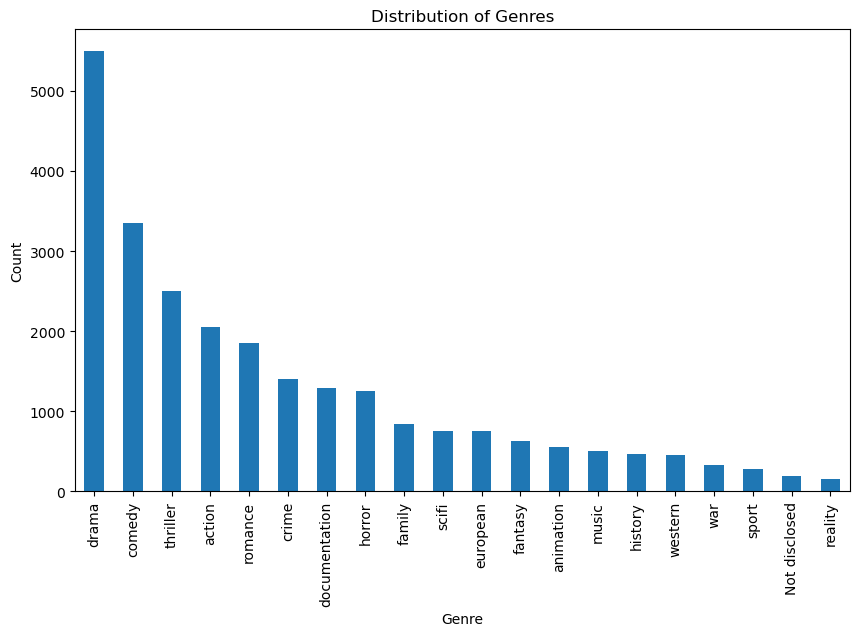

In [128]:
# Split genres into individual columns
genres = df['genres'].str.split(', ', expand=True).stack().value_counts()
print("Genre Counts:\n", genres)

# Plot genres
plt.figure(figsize=(10, 6))
genres.plot(kind='bar')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

Correlation Matrix:
                  release_year  duration   seasons    rating  imdb_votes  \
release_year         1.000000  0.058742  0.017822  0.027028    0.000389   
duration             0.058742  1.000000 -0.341194 -0.096521    0.103580   
seasons              0.017822 -0.341194  1.000000  0.194784    0.028222   
rating               0.027028 -0.096521  0.194784  1.000000    0.156956   
imdb_votes           0.000389  0.103580  0.028222  0.156956    1.000000   
tmdb_popularity      0.036711 -0.018710  0.112728  0.052964    0.166646   
tmdb_score           0.094353 -0.051740  0.159172  0.487352    0.137913   

                 tmdb_popularity  tmdb_score  
release_year            0.036711    0.094353  
duration               -0.018710   -0.051740  
seasons                 0.112728    0.159172  
rating                  0.052964    0.487352  
imdb_votes              0.166646    0.137913  
tmdb_popularity         1.000000    0.073639  
tmdb_score              0.073639    1.000000  


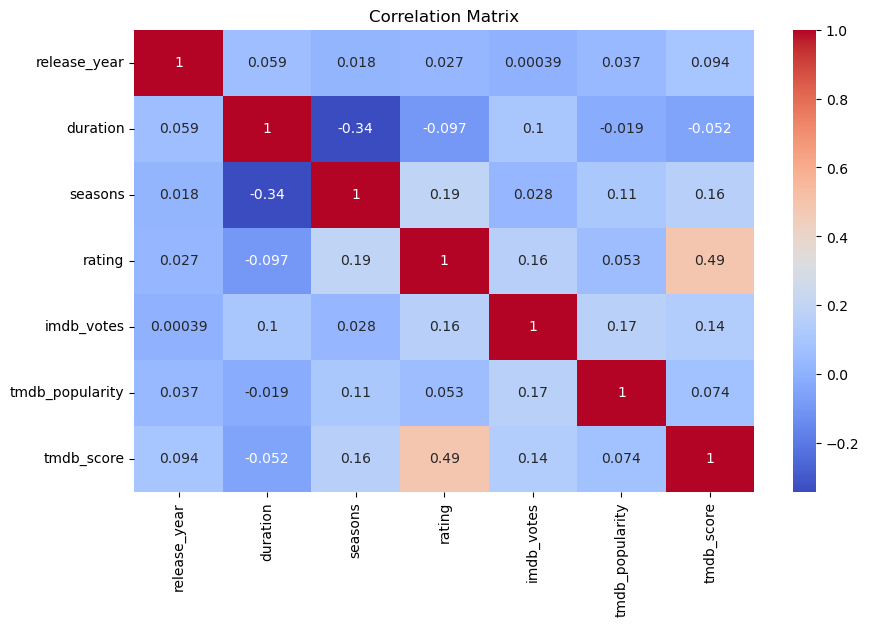

In [129]:
# Select numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numerical_features.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

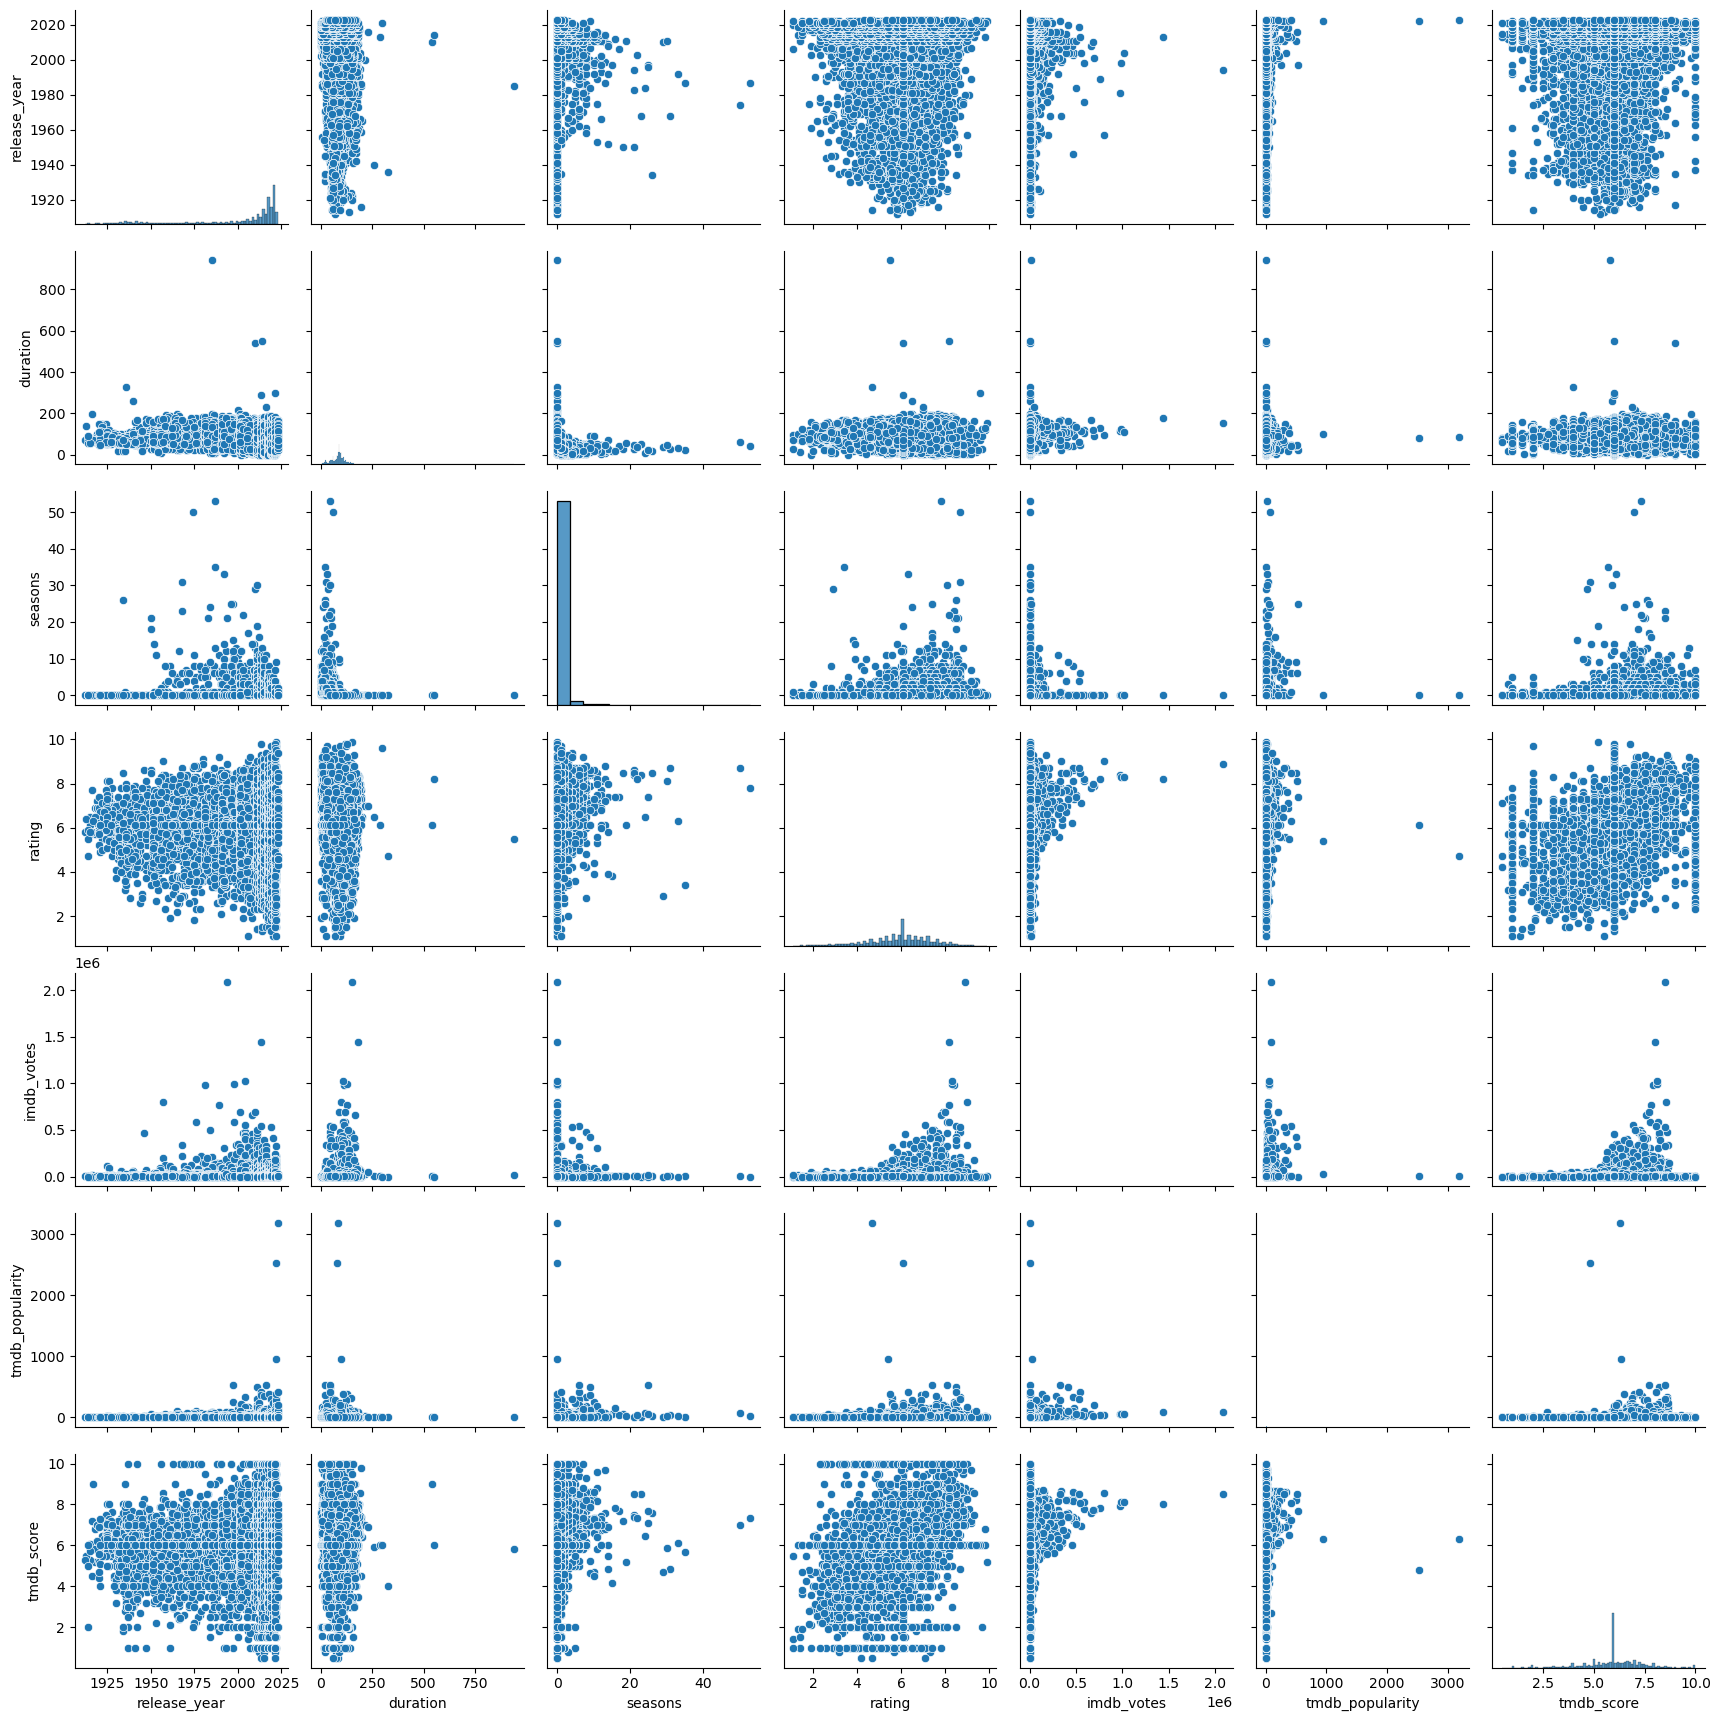

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for numerical features
sns.pairplot(numerical_features)
plt.show()

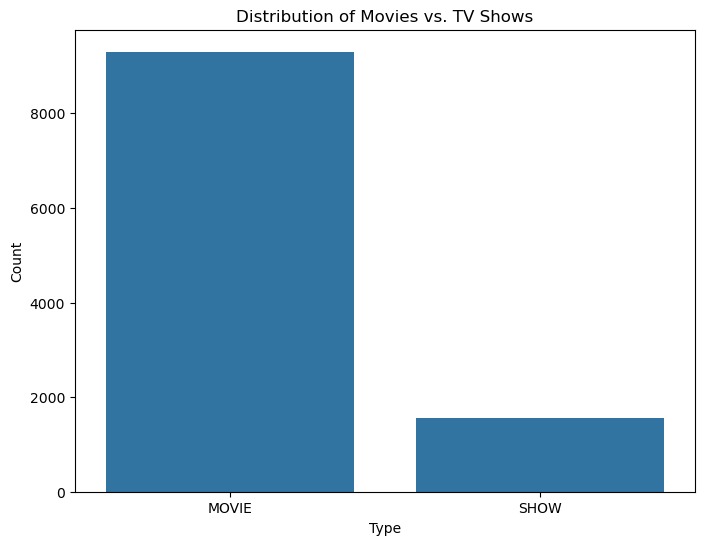

In [131]:
# Count the number of movies and TV shows
type_distribution = df['type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=type_distribution.index, y=type_distribution.values)
plt.title('Distribution of Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Handling outliers using IQR

In [132]:
# Detect outliers in ratings using IQR
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['rating'] < (Q1 - 1.5 * IQR)) | (df['rating'] > (Q3 + 1.5 * IQR))]
print("Outliers in Ratings:\n", outliers[['title', 'rating']])

# Detect outliers in IMDb votes
Q1_votes = df['imdb_votes'].quantile(0.25)
Q3_votes = df['imdb_votes'].quantile(0.75)
IQR_votes = Q3_votes - Q1_votes
outliers_votes = df[(df['imdb_votes'] < (Q1_votes - 1.5 * IQR_votes)) | (df['imdb_votes'] > (Q3_votes + 1.5 * IQR_votes))]
print("Outliers in IMDb Votes:\n", outliers_votes[['title', 'imdb_votes']])

# Detect outliers in TMDB popularity
Q1_popularity = df['tmdb_popularity'].quantile(0.25)
Q3_popularity = df['tmdb_popularity'].quantile(0.75)
IQR_popularity = Q3_popularity - Q1_popularity
outliers_popularity = df[(df['tmdb_popularity'] < (Q1_popularity - 1.5 * IQR_popularity)) | (df['tmdb_popularity'] > (Q3_popularity + 1.5 * IQR_popularity))]
print("Outliers in TMDB Popularity:\n", outliers_popularity[['title', 'tmdb_popularity']])

Outliers in Ratings:
                                    title  rating
204                          Sex Madness     2.8
230                  I Accuse My Parents     2.6
780                    The White Gorilla     2.8
989    Santa Claus Conquers the Martians     2.7
1137             Track of the Moon Beast     2.3
...                                  ...     ...
10749                               Howl     2.6
10750                              Chain     1.8
10789                          Butterfly     2.8
10806                       One Bad Turn     2.5
10828                    Jinny's Kitchen     9.4

[198 rows x 2 columns]
Outliers in IMDb Votes:
                              title  imdb_votes
0            It's a Wonderful Life    467766.0
1                        Duck Soup     60933.0
2                  His Girl Friday     60244.0
4                        Red River     32210.0
6      The Best Years of Our Lives     66209.0
...                            ...         ...
10814      S

Sample of Outliers in Ratings, IMDb Votes, and TMDB Popularity:
                                  title  rating  \
204                         Sex Madness     2.8   
230                 I Accuse My Parents     2.6   
780                   The White Gorilla     2.8   
989   Santa Claus Conquers the Martians     2.7   
1137            Track of the Moon Beast     2.3   

                                  title  imdb_votes title  tmdb_popularity  
204                                 NaN         NaN   NaN              NaN  
230                                 NaN         NaN   NaN              NaN  
780                                 NaN         NaN   NaN              NaN  
989   Santa Claus Conquers the Martians     12117.0   NaN              NaN  
1137                                NaN         NaN   NaN              NaN  


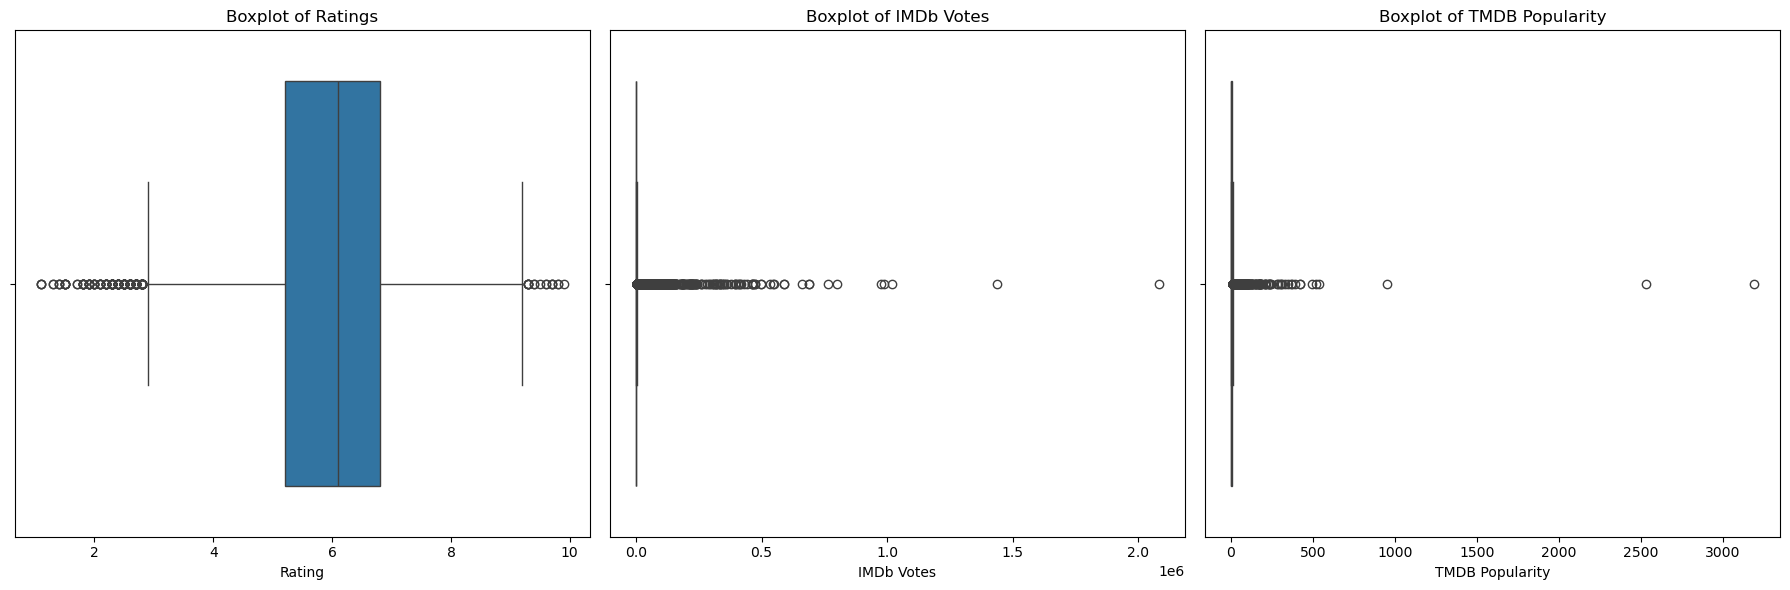

In [133]:
# Detect outliers in ratings using IQR
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['rating'] < (Q1 - 1.5 * IQR)) | (df['rating'] > (Q3 + 1.5 * IQR))]

# Detect outliers in IMDb votes
Q1_votes = df['imdb_votes'].quantile(0.25)
Q3_votes = df['imdb_votes'].quantile(0.75)
IQR_votes = Q3_votes - Q1_votes
outliers_votes = df[(df['imdb_votes'] < (Q1_votes - 1.5 * IQR_votes)) | (df['imdb_votes'] > (Q3_votes + 1.5 * IQR_votes))]

# Detect outliers in TMDB popularity
Q1_popularity = df['tmdb_popularity'].quantile(0.25)
Q3_popularity = df['tmdb_popularity'].quantile(0.75)
IQR_popularity = Q3_popularity - Q1_popularity
outliers_popularity = df[(df['tmdb_popularity'] < (Q1_popularity - 1.5 * IQR_popularity)) | (df['tmdb_popularity'] > (Q3_popularity + 1.5 * IQR_popularity))]

# Combine all outliers
combined_outliers = pd.concat([outliers[['title', 'rating']], outliers_votes[['title', 'imdb_votes']], outliers_popularity[['title', 'tmdb_popularity']]], axis=1)

# Display a sample of the outliers for better readability
print("Sample of Outliers in Ratings, IMDb Votes, and TMDB Popularity:")
print(combined_outliers.head())

# Plot boxplots to visualize outliers

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for ratings
sns.boxplot(ax=axes[0], x=df['rating'])
axes[0].set_title('Boxplot of Ratings')
axes[0].set_xlabel('Rating')

# Plot for IMDb votes
sns.boxplot(ax=axes[1], x=df['imdb_votes'])
axes[1].set_title('Boxplot of IMDb Votes')
axes[1].set_xlabel('IMDb Votes')

# Plot for TMDB popularity
sns.boxplot(ax=axes[2], x=df['tmdb_popularity'])
axes[2].set_title('Boxplot of TMDB Popularity')
axes[2].set_xlabel('TMDB Popularity')

# Display the plots
plt.tight_layout()
plt.show()


In [134]:
# Remove outliers from the dataset
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for 'rating', 'imdb_votes', and 'tmdb_popularity'
data_cleaned = remove_outliers_iqr(df, 'rating')
data_cleaned = remove_outliers_iqr(data_cleaned, 'imdb_votes')
data_cleaned = remove_outliers_iqr(data_cleaned, 'tmdb_popularity')

print("Dataset after removing outliers:\n", data_cleaned)

Dataset after removing outliers:
               id                               title   type  \
12       tm97735                   She Had to Choose  MOVIE   
14       tm83723                Mr. Bug Goes to Town  MOVIE   
18       tm17025              The Cat and the Canary  MOVIE   
22       tm63937                    The Great Rupert  MOVIE   
26        tm5096                          Blonde Ice  MOVIE   
...          ...                                 ...    ...   
10860  tm1292884                                Hunt  MOVIE   
10861  tm1284753                  Ennalum Ente Aliya  MOVIE   
10862  tm1303380  Anubhav Singh Bassi: Bas Kar Bassi  MOVIE   
10863  tm1307408     Pinkfong! Summer in Wonderville  MOVIE   
10864  tm1297385                            Chapelle  MOVIE   

                                             description  release_year  \
12     A young actress hits Hollywood determined to b...        1934.0   
14     The happy tranquility of Bugville is shattered...     

In [135]:
pip install mplcursors

Note: you may need to restart the kernel to use updated packages.


Feature Engineering

In [142]:
# One-hot encode genres
df_genres = df['genres'].str.get_dummies(sep=', ')

# Combine with original dataframe
df = pd.concat([df, df_genres], axis=1)

# Create user-item matrix (example: assuming user data is available)
# user_item_matrix = pd.pivot_table(data, values='rating', index='user_id', columns='id')